# Predicting Heart Disease

## Task and dataset description

The task is to predict whether a subject has heart disease based on 13 attributes. The "Heart Disease Data Set" can be found at https://archive.ics.uci.edu/ml/datasets/Heart+Disease. Each observation represents a subject, and there is a total of 303 observations. The following is a description of the attributes: 

1. age  
2. sex (1 = male; 0 = female) 
3. cp: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
4. restbps: resting blood pressure (in mm Hg on admission to the hospital) 
5. chol: serum cholesterol in mg/dl 
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
7. restecg: resting electrocardiographic results 
      --  0 = normal 
      --  1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
      --  2 = showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment  (1 = upsloping, 2 = flat, 3 = downsloping)
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal (3 = normal; 6 = fixed defect; 7 = reversable defect) 
14. number: diagnosis of heart disease (angiographic disease status) 
      -- 0: < 50% diameter narrowing (no heart disease) 
      -- 1-4: > 50% diameter narrowing  (heart disease)


In [0]:
#import libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve, f1_score, roc_auc_score

__author__ = "Estefy Fiallos"
__email__ = "estefy.b.fiallos@gmail.com"


## Load the data

In [3]:
#load the data into a Pandas dataframe
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header=None, names=columns)

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


##Data Quality Check

In [4]:
#look for missing values
df.isnull().any()

age        False
sex        False
cp         False
restbp     False
chol       False
fbs        False
restecg    False
thalach    False
exang      False
oldpeak    False
slope      False
ca         False
thal       False
num        False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null float64
cp         303 non-null float64
restbp     303 non-null float64
chol       303 non-null float64
fbs        303 non-null float64
restecg    303 non-null float64
thalach    303 non-null float64
exang      303 non-null float64
oldpeak    303 non-null float64
slope      303 non-null float64
ca         303 non-null object
thal       303 non-null object
num        303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [6]:
#Convert discrete features to integers

categorical_features=['sex','cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

encoders = dict() 

for i in categorical_features:
  encoders[i] = LabelEncoder()
  df[i] = encoders[i].fit_transform(df[i])
  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null int64
cp         303 non-null int64
restbp     303 non-null float64
chol       303 non-null float64
fbs        303 non-null int64
restecg    303 non-null int64
thalach    303 non-null float64
exang      303 non-null int64
oldpeak    303 non-null float64
slope      303 non-null int64
ca         303 non-null int64
thal       303 non-null int64
num        303 non-null int64
dtypes: float64(5), int64(9)
memory usage: 33.2 KB


In [7]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0,1,0
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3,0,2
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2,2,1
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0,0,0
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0,0,0


In [9]:
#Change target variable 'num' to binary: 0=no disease, 1=heart disease (instead of 1-4)

df.num = [1 if i > 0 else i for i in df.num]

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0,1,0
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3,0,1
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2,2,1
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0,0,0
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0,0,0


After exploring the data quality, we can see that the dataset does not contain missing values. I converted discrete features into integers and made the target variable a binary case, where 0 = no disease and 1= heart disease in place of the 1-4 heart disease categories. 

##Exploratory Data Analysis

In [10]:
df.shape

(303, 14)

In [11]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.716172,0.851485,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.005927,0.970282,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


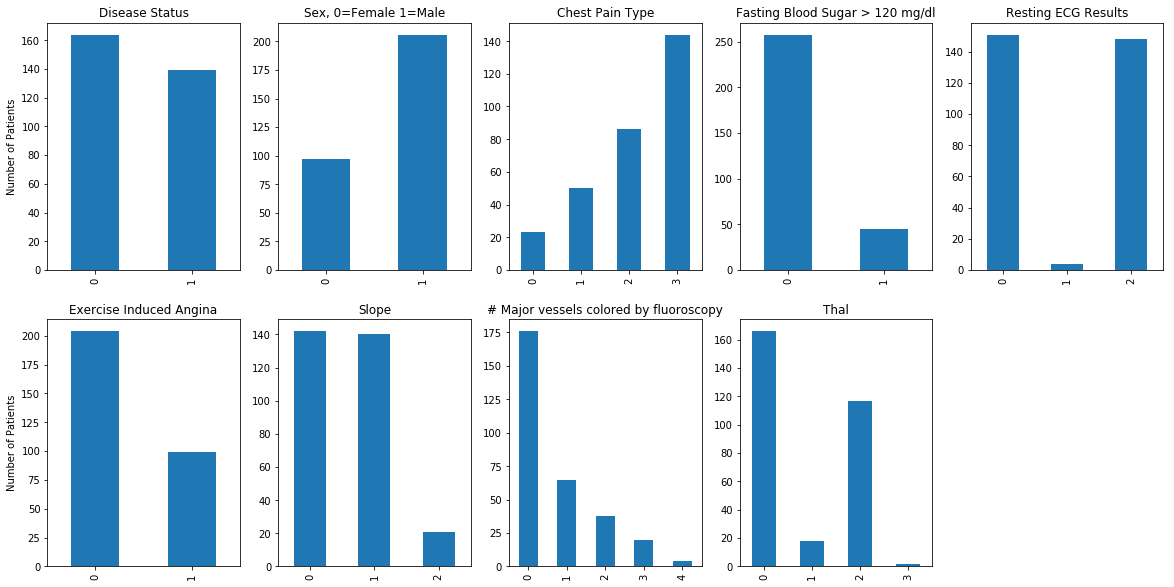

In [13]:
#Check distributions of discrete variables

def discrete_dist(fignum, var, title):
  plt.subplot(2,5, fignum)
  var.value_counts(sort=False).plot(kind='bar', title = title)

plt.subplots(figsize=(20, 10))

discrete_dist(1, df.num, 'Disease Status')
plt.ylabel('Number of Patients')
discrete_dist(2, df.sex, 'Sex, 0=Female 1=Male')
discrete_dist(3, df.cp, 'Chest Pain Type')
discrete_dist(4, df.fbs, 'Fasting Blood Sugar > 120 mg/dl')
discrete_dist(5, df.restecg, 'Resting ECG Results')
discrete_dist(6, df.exang, 'Exercise Induced Angina')
plt.ylabel('Number of Patients')
discrete_dist(7, df.slope, 'Slope')
discrete_dist(8, df.ca, '# Major vessels colored by fluoroscopy')
discrete_dist(9, df.thal, 'Thal')

plt.show()

After examining the distributions of discrete variables I noted the following: 

*   There are less heart disease patients (1) than asymptomatic patients (0), but the classes are not too imbalanced.
*   There are about twice as much male patients than female patients
*   The most prevalent chest pain type is "asymptomatic" (3), or no chest pain, followed by "non-anginal pain" (3)
*   Only a small proportion of patients have fasting blood sugar > 120 mg/dl (1)
*   Resting ECG results are mainly split between "normal" (0) and "showing probable or definite left ventricular hypertrophy by Estes' criteria" (2)




I noticed that there is one more category than expected in "thal" and "ca". I will explore the original labels for these categories.

In [14]:
#Get original labels for 'ca'
list(encoders['ca'].classes_)

['0.0', '1.0', '2.0', '3.0', '?']

In [15]:
#Get original labels for 'thal'
list(encoders['thal'].classes_)

['3.0', '6.0', '7.0', '?']

It appears that there are missing values in "thal" and "ca" denoted by "?". Since there are only a few missing values, I will delete these rows.


In [16]:
df = df[df.thal != 3]
df = df[df.ca != 4]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age        297 non-null float64
sex        297 non-null int64
cp         297 non-null int64
restbp     297 non-null float64
chol       297 non-null float64
fbs        297 non-null int64
restecg    297 non-null int64
thalach    297 non-null float64
exang      297 non-null int64
oldpeak    297 non-null float64
slope      297 non-null int64
ca         297 non-null int64
thal       297 non-null int64
num        297 non-null int64
dtypes: float64(5), int64(9)
memory usage: 34.8 KB


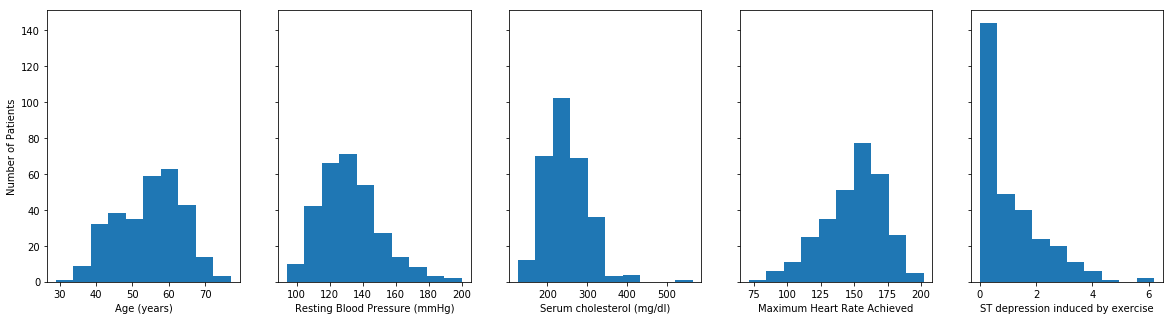

In [18]:
#Examine distributions of continuous variables
fig, axes = plt.subplots( nrows=1, ncols=5, sharey='row', figsize=(20,5))

axes[0].hist(df.age)
axes[0].set_xlabel("Age (years)")
axes[0].set_ylabel("Number of Patients")
axes[1].hist(df.restbp)
axes[1].set_xlabel('Resting Blood Pressure (mmHg)')
axes[2].hist(df.chol)
axes[2].set_xlabel("Serum cholesterol (mg/dl)")                  
axes[3].hist(df.thalach)
axes[3].set_xlabel("Maximum Heart Rate Achieved")
axes[4].hist(df.oldpeak)
axes[4].set_xlabel("ST depression induced by exercise")                   

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name

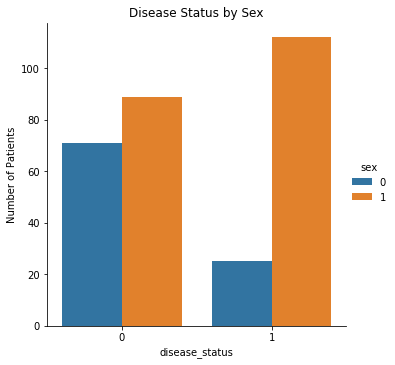

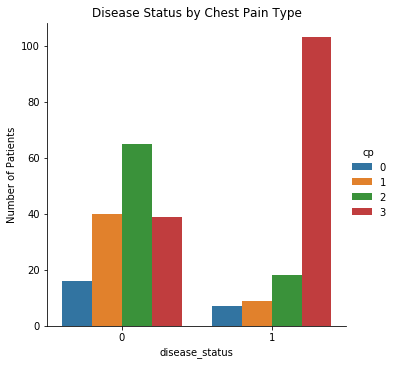

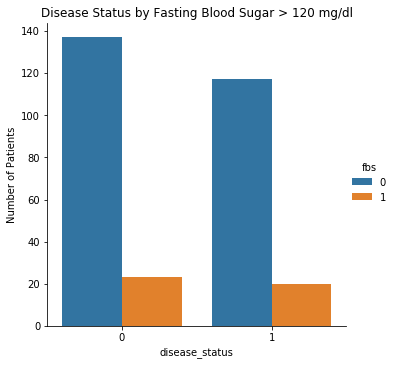

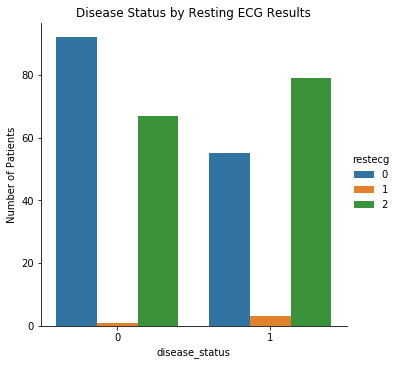

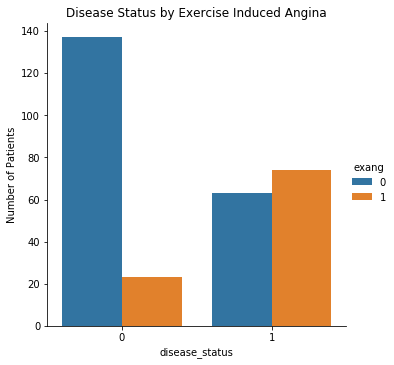

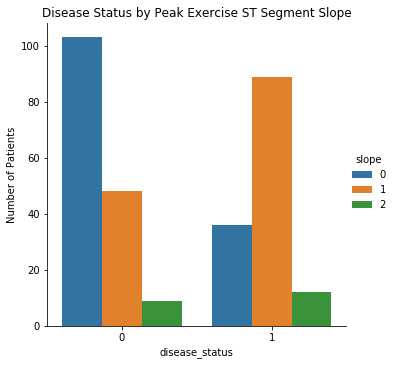

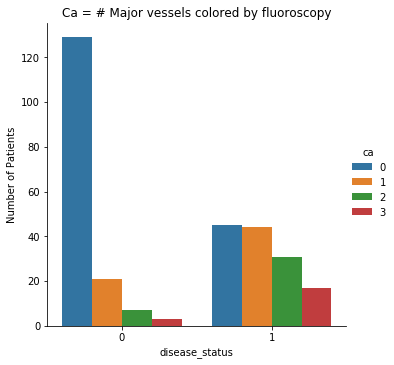

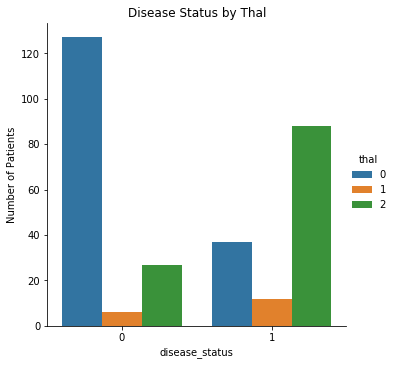

In [26]:
#Check distribution of discrete variables by disease status

def distbydisease(var, title):
  counts = df.groupby('num')[var].value_counts()
  df2 = pd.DataFrame([counts.index.labels[0], counts.index.labels[1], counts.values], index=['disease_status', var, 'count'])
  df3 = df2.transpose()
  sns.factorplot(x='disease_status', y='count', hue=var, data=df3, kind='bar')
  plt.title(title)
  plt.ylabel('Number of Patients')

distbydisease('sex', 'Disease Status by Sex')
distbydisease('cp', 'Disease Status by Chest Pain Type')
distbydisease('fbs', 'Disease Status by Fasting Blood Sugar > 120 mg/dl')
distbydisease('restecg','Disease Status by Resting ECG Results')
distbydisease('exang','Disease Status by Exercise Induced Angina')
distbydisease('slope', 'Disease Status by Peak Exercise ST Segment Slope')
distbydisease('ca', 'Ca = # Major vessels colored by fluoroscopy')
distbydisease('thal', 'Disease Status by Thal')


After checking the distributions of discrete variables by disease status, I noted the following: 


*   There is a larger proportion of male patients with heart disease compared to female patients (Must keep in mind that there are about twice as many male patients as female patients)
*  Surprinsingly, there were more asymptomatic patients (with respect to chest pain) in the heart disease category compared to no heart disease. In turn, the no heart disease category has more patients with typical angina, atypical angina, and non-anginal pain. 
*  There was not much difference between heart disease and asymptomatic patients with respect to fasting blood sugar levels. 
*   As expected, there were more people with normal rest ecg results in the no heart disease category than in the heart disease category and more people with abnormalities in the heart disease category.
*  There were about 3 times as many patients with exercise induced angina in the heart disease category versus no heart disease. 
*  There were more patients with a "flat" slope of the peak exercise ST segment in the heart disease category than in no heart disease. Also there are more patients with an "upsloping" slope of the peak exercise ST segnment in asymptomatic patients versus heart disease patients. 
*  There are more patients with 1 or more vessels colored by fluoroscopy in the heart disease category compared to no heart disease. 
*  There are more patients with heart defects in the heart disease category vesus no heart disease

Based on these findings, I hypothesize that the most useful variables to detect heart disease are chest pain, rest ecg, exang (exercise induced angina), slope (slope of peak exercise ST segment), ca (number of major vessels colored by fluoroscopy), and thal (defects). 

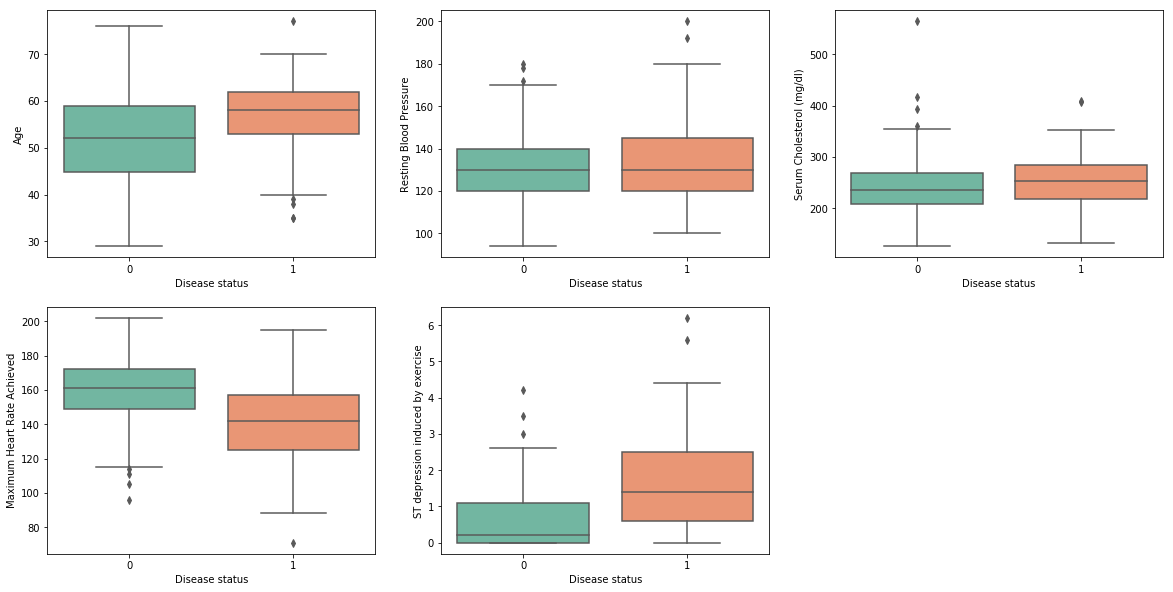

In [29]:
#Compare continuous features based on disease status 0=no disease 1=heart disease
plt.subplots(figsize=(20, 10))

def contbydisease (num, var, ylab):
  plt.subplot(2,3,num)
  sns.boxplot(x='num', y=var, data=df, palette="Set2")
  plt.ylabel(ylab)
  plt.xlabel('Disease status')

contbydisease(1, 'age', 'Age')
contbydisease(2, 'restbp', 'Resting Blood Pressure')
contbydisease(3, 'chol', 'Serum Cholesterol (mg/dl)')
contbydisease(4, 'thalach', 'Maximum Heart Rate Achieved')
contbydisease(5, 'oldpeak', 'ST depression induced by exercise')

plt.show()


After comparing continuous features by disease status, I noted the following:


*   Patients with heart disease are slighly older than asymptomatic patients
*  There was no discernible difference in resting blood pressure between different disease status 
*  There was no discernible difference in serum cholesterol between different disease status
*  Patients without heart disease achieved a higher maximum heart rate than patients with heart disease
*  There was more ST depression induced by exercise in patients with heart disease versus no heart disease. 

Based on these observations, I hypothesize that thalach (maximum heart rate) and oldpeak (ST depression induced by exercise) will be most useful for classification. 


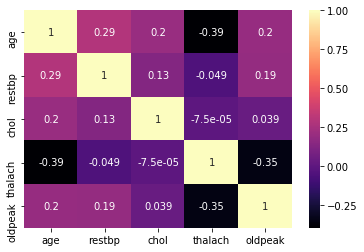

In [42]:
#Check for correlation between continuous features
num_var = ['age', 'restbp', 'chol', 'thalach', 'oldpeak']
sns.heatmap(df[num_var].corr(), annot=True, cmap="magma")

plt.show()

There is a negative correlation between thalach and age and between thalach and oldpeak. 

Thalach is the maximum heart rate achieved. It makes sense that younger patients would achieve a higher maximum heart rate since in general younger patients will be in better health. It also makes sense that patients with less ST depression induced by exercise (oldpeak) would achieve higher maximum heart rate since ST depression is associated with heart disease. 

##Pre-processing


In [43]:
#Change categorical variable to category type

df[categorical_features] = df[categorical_features].astype('category')

#Scale numeric variables

ss = dict() 

for i in num_var:
  ss[i] = StandardScaler()
  df[i] = ss[i].fit_transform(df[i].values.reshape(-1, 1))

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,1,0,0.750380,-0.276443,1,2,0.017494,0,1.068965,2,0,1,0
1,1.378929,1,3,1.596266,0.744555,0,2,-1.816334,1,0.381773,1,3,0,1
2,1.378929,1,3,-0.659431,-0.353500,0,2,-0.899420,1,1.326662,1,2,2,1
3,-1.941680,1,2,-0.095506,0.051047,0,0,1.633010,0,2.099753,2,0,0,0
4,-1.498933,0,1,-0.095506,-0.835103,0,2,0.978071,0,0.295874,0,0,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age        297 non-null float64
sex        297 non-null category
cp         297 non-null category
restbp     297 non-null float64
chol       297 non-null float64
fbs        297 non-null category
restecg    297 non-null category
thalach    297 non-null float64
exang      297 non-null category
oldpeak    297 non-null float64
slope      297 non-null category
ca         297 non-null category
thal       297 non-null category
num        297 non-null int64
dtypes: category(8), float64(5), int64(1)
memory usage: 29.5 KB



##Split Train/Test Set

In [0]:
heart = df.iloc[:, :13]
target = df.iloc[:, 13]

heart_train, heart_test, target_train, target_test = train_test_split(heart, target, test_size=0.20, random_state=123, stratify = target)

##Modeling

###---K Nearest Neighbors Classifier---

In [65]:
knn = KNeighborsClassifier()

knn_result = cross_val_score(knn, heart_train, target_train, cv=5, scoring='accuracy')

knn_result.mean()

0.8059936786925685

In [66]:
knn.fit(heart_train, target_train)
predictions = knn.predict(heart_test)

print(accuracy_score(target_test, predictions))
print(confusion_matrix(target_test, predictions))
print(classification_report(target_test, predictions))

0.8666666666666667
[[27  5]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.83      0.89      0.86        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



###---Logistic Regression---

In [67]:
lr = LogisticRegression()

lr_result = cross_val_score(lr, heart_train, target_train, cv=5, scoring='accuracy')

lr_result.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.8356151711378355

In [68]:
lr.fit(heart_train, target_train)
predictions = lr.predict(heart_test)

print(accuracy_score(target_test, predictions))
print(confusion_matrix(target_test, predictions))
print(classification_report(target_test, predictions))

0.85
[[26  6]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.89      0.85        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###---Random Forest Classifier---

In [69]:
rf = RandomForestClassifier()

rf_result = cross_val_score(rf, heart_train, target_train, cv=5, scoring='accuracy')

rf_result.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

0.7773743447425223

In [70]:
rf.fit(heart_train, target_train)
predictions = rf.predict(heart_test)

print(accuracy_score(target_test, predictions))
print(confusion_matrix(target_test, predictions))
print(classification_report(target_test, predictions))

0.8833333333333333
[[28  4]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.86      0.89      0.88        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


###Compare Model Performance with AUC curve

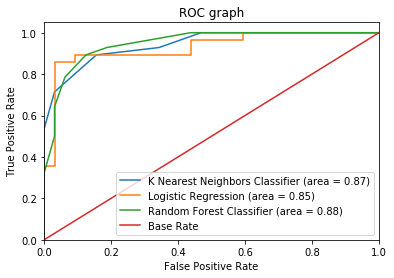

In [71]:
from sklearn.metrics import roc_curve
lr_fpr, lr_tpr, lr_thresholds = roc_curve(target_test, lr.predict_proba(heart_test)[:, 1])
lr_auc = roc_auc_score(target_test, lr.predict(heart_test))

rf_fpr, rf_tpr, rf_thresholds = roc_curve(target_test, rf.predict_proba(heart_test)[:, 1])
rf_auc = roc_auc_score(target_test, rf.predict(heart_test))

knn_fpr, knn_tpr, knn_thresholds = roc_curve(target_test, knn.predict_proba(heart_test)[:, 1])
knn_auc = roc_auc_score(target_test, knn.predict(heart_test))

plt.figure()

plt.plot(knn_fpr, knn_tpr, label = 'K Nearest Neighbors Classifier (area = %0.2f)' % knn_auc)
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression (area = %0.2f)' % lr_auc)
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest Classifier (area = %0.2f)' %rf_auc)

plt.plot([0,1], [0,1], label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title ('ROC graph')
plt.legend(loc='lower right')

plt.show()

Overall, the models performed similarly. The winner is the random forest classifier, but it's not likely that its performance is significantly different from the others. Nevertheless, I will try to tune the hyperparameters for the random forest classifier.

###Hyperparameter Tuning for Random Forest Classifier

In [73]:
tuned_parameters = [{'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150], 'max_features': ['auto', 'log2', None]}]
grid = GridSearchCV(rf, tuned_parameters, cv=5, scoring = "accuracy")  
grid.fit(heart_train, target_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [74]:
print(grid.best_params_)

{'max_features': 'log2', 'n_estimators': 90}


In [75]:
rf2 = RandomForestClassifier(n_estimators = 90, max_features='log2')

rf2_result = cross_val_score(rf2, heart_train, target_train, cv=5, scoring='accuracy')

rf2_result.mean()

0.819041011409189

In [76]:
rf2.fit(heart_train, target_train)
predictions = rf2.predict(heart_test)

print(accuracy_score(target_test, predictions))
print(confusion_matrix(target_test, predictions))
print(classification_report(target_test, predictions))
print(roc_auc_score(target_test, predictions))

0.8833333333333333
[[28  4]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.86      0.89      0.88        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

0.8839285714285714


After hyperparameter tuning, the model had higher accuracy on the training data and about the same performance on the test data. Since there is not much of a difference between the two models, I will continue to use the original parameters. 

###Feature Importance

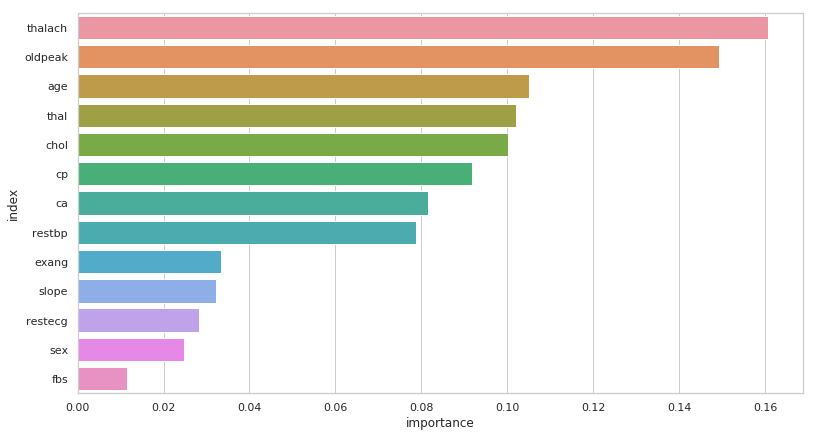

In [77]:
#Extract feature importance from Random Forest Classifier

feature_importances = pd.DataFrame(rf.feature_importances_, index = heart_train.columns, columns = ['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(13, 7))

sns.barplot(x="importance", y='index', data=feature_importances, label='Total')

To understand which are the most important features, I will add a column of random noise to the data and check it's importance measure against the other features. 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


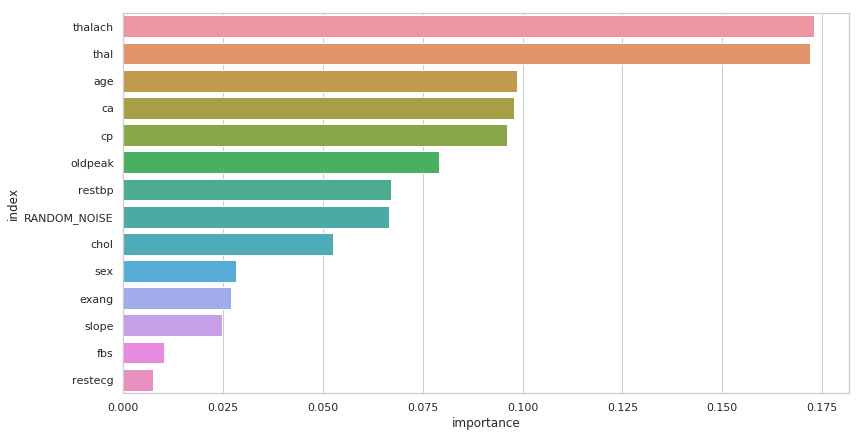

In [80]:
#Add a column of random noise and re-plot feature importance

heart_train_rnoise = pd.DataFrame(heart_train)
heart_train_rnoise['RANDOM_NOISE'] = np.random.normal(0, 1, heart_train_rnoise.shape[0])

rf_random = RandomForestClassifier()
rf_random = rf_random.fit(heart_train_rnoise, target_train)

feature_importances_random = pd.DataFrame(rf_random.feature_importances_, index = heart_train_rnoise.columns, columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_random = feature_importances_random.reset_index()

sns.set(style='whitegrid')

f, ax = plt.subplots(figsize=(13, 7))

sns.barplot(x="importance", y='index', data=feature_importances_random, label='Total')

I will consider everything above RANDOM_NOISE to be the most important features for the classification problem. These features include thalach (maximum heart rate achieved), thal, age, ca (number of major vessels colored by fluoroscopy), cp (chest pain type), and oldpeak (ST depression induced by exercise relative to rest). I am not including restbp since it's importance is about the same as random noise.   

##Conclusion

The three models tested (K Nearest Neighbors, Logistic Regression, and Random Forest Classifier) performed similarly in the classification of heart disease with AUC scores of .87, .85, and .88, respectively. 

The most important feature for classification appears to be **thalach** (maximum heart rate achieved). From the EDA we saw that people with heart disease had a lower maximum heart rate than people without heart disease. The second-highest ranked feature is **thal**,  but there's little information provided for this feature. Upon a quick google search, I suspect this may refer to a thallium stress test, which can be used to identify reversible and fixed heart defects. It is intuitive that a test that detects heart defects would be a good predictor of heart disease. **Age** was also a good predictor of heart disease. The EDA showed that patients with heart disease tended to be older than patients without heart disease. Next is **ca**, the number of major vessels colored by fluoroscopy. I suspect that ca refers to calcium and that this is a test to detect calcified plaques in the vessels of the heart. These plaques can block blood vessels in the heart, and they indicate coronary artery disease. It follows that having 1 or more vessels colored by fluoroscopy is indicative of heart disease. The type of chest pain, **cp** was also predictive of heart disease. As noted in the EDA section, there were more asymptomatic patients in the heart disease category than in no heart disease, and more patients with different types of chest pain in the no heart disease group. This seems counterintuitive, and it would be worth following up with an expert on this finding. Finally, **oldpeak** (the ST depression induced by exercise relative to rest) was another predictor of heart disease, and it appears that higher ST depression is related to heart disease. In fact, ST depression is associated with cardiac ischemia and infarction (1). 

1. T Pollehn, W J Brady, A D Perron, F Morris, The electrocardiographic differential diagnosis of ST segment depression. Emergency Medicine Journal 19, 129–135 (2002).